# <p style="background-color:red;font-family:arial;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>DATA ON PROCESSING</b></p>
![](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZGZlcWkzN2Y5M2MxNjN4MWxyeTE1endkZnp5MWptajIzdXkwOHBxNCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/UDclWKlmfmq7twI3iJ/giphy.gif)

<b>If you want to be the first to be informed about new projects, please do not forget to follow us </b>[Linkedin](https://www.linkedin.com/in/fatma-nur-azman/) | [Kaggle](https://www.kaggle.com/fnurazman) | [Tableau](https://public.tableau.com/app/profile/fatma.nur.azman/vizzes)

Data cleaning (data cleaning / cleasing)
- Noisy Data
- Outlier Observation Analysis
- Missing Data Analysis

Data Standardization
- 0-1 Conversion
- Convert to z-score
- Logarithmic Conversion
 Data Reduction
- Reducing the Number of Observations
- Reducing the Number of Variables

Variable Transformations
- Transformations in continuous variables
- Transformations in categorical variables

##  <font color='blue'> <b>DATA CLEANING / CLEASING </b><font color='black'> 


### Noisy Data

The category of being both male and pregnant is wrong data. For example, a baby bottle costs 1 million dollars.

### Outlier Observation Analysis


Observations that are quite different from the general trend in the data or observations that are quite different from other observations are called outlier data. Outlier 
It causes bias. 


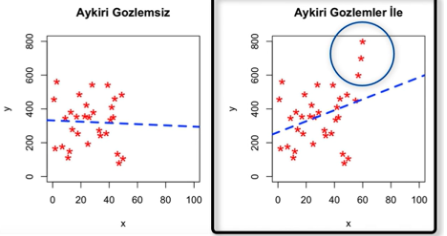

Outlier Observation According to What and According to Whom?

1. "Sector Information"

For example, not modeling 1000 square meter houses in a house price prediction model.

2. "Standard Deviation Approach"

The standard deviation of the same variable is calculated and added to the mean of a variable. 1, 2 or 3 standard deviation values are considered as the threshold value that emerges by adding the value to the mean, and values above or below this value are defined as outliers.

3." Z-Score Approach"

It works similarly to the standard deviation method.  The variable is fitted to the standard normal distribution, i.e. standardized. Then a threshold value is set - for example, +-25 from the right and left of the distribution - and values above or below this value are marked as outliers.

4. "Boxplot (interquartile range - IQR)"

It is one of the most common methods.  The values of the variable are sorted from smallest to largest. A threshold value is calculated over the values corresponding to their quartiles (percentages), i.e. Q1, Q3 values, and an outlier is defined according to this value.

#### Capturing Outliers

In [ ]:
import seaborn as sns

df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]
df_table.head()

In [ ]:
sns.boxplot(x=df_table)

In [ ]:
round(df_table.describe().T, 1)

In [ ]:
from scipy.stats import iqr

IQR = iqr(df_table)

In [ ]:
bottom_nerve= np.percentile(df_table, 25) - 1.5 * IQR
upper_nerve = np.percentile(df_table, 75) + 1.5 * IQR

In [ ]:
df_table[(df_table < bottom_nerve) | (df_table > upper_nerve)]

In [ ]:
df_table[(df_table < bottom_nerve)] # aykırı değerler

In [ ]:
df_table[(
    df_table < bottom_nerve
)].index  # indexlerine ulaştık böylece silme yada düzeltme yapabiliriz.

#####  Solving the Outlier Problem

##### Delete

In [ ]:
import pandas as pd

type(df_table)

In [ ]:
df_table = pd.DataFrame(df_table)

In [ ]:
df_table.shape

In [ ]:
t_df = df_table[~((df_table < bottom_nerve) | (df_table > upper_nerve)).any(axis=1)]
t_df

In [ ]:
t_df.shape

#####   filling with average

In [ ]:
import seaborn as sns

df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]
df_table.head()

In [ ]:
contrary_tf = (df_table < bottom_nerve)

In [ ]:
df_table[contrary_tf]

In [ ]:
df_table.mean()

In [ ]:
pd.options.mode.chained_assignment = None 
df_table["contrary_tf"] = df_table.mean()


In [ ]:
df_table["contrary_tf"]

#####  Suppression Method (If the outlier is above, the lower value is given and if the outlier is below, the upper value is given).

In [ ]:
import seaborn as sns

df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]
df_table.head()

In [ ]:
df_table[contrary_tf]

In [ ]:
df_table[contrary_tf] = bottom_nerve

In [ ]:
df_table[contrary_tf]

#####  Multivariate Outlier Observation Analysis

Local Outlier Factor

 It allows us to score observations based on intensity at their location and identify outliers accordingly. For example, below, a person cannot get married 3 times at the age of 17, even if he/she does, he/she is an outlier. There is a neighborhood structure here.

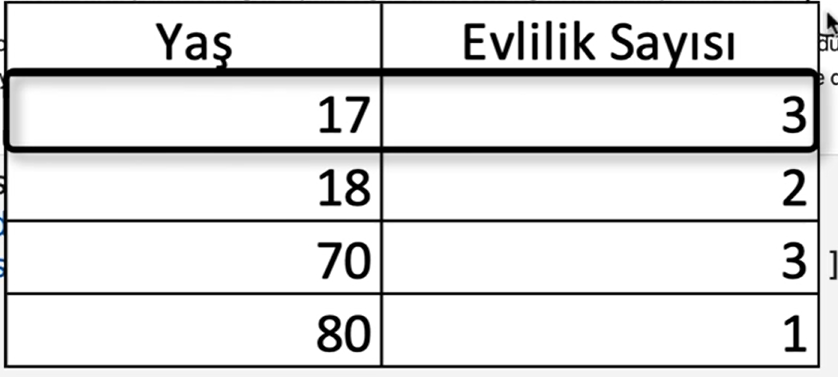

In [ ]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include=["float64", "int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

 - LocalOutlierFactor (LOF) algorithm is an outlier detection algorithm that helps detect outliers by evaluating the locational density of data points.

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)  #  we have defined a formal property.

 n_neighbors = The number of neighbors to consider when evaluating the local density of a data point. It is generally recommended to choose the most appropriate value by experimenting with various values of n_neighbors and observing the results. Also, techniques such as cross-validation can be used to determine this value.

contamination = Determines the percentage of data points that will be considered outliers. This value helps us estimate how much of the dataset is made up of outliers. For example, if contamination=0.1, it means that about 10% of the total data set is outliers.For example, if your data set has a high proportion of outliers, i.e. a significant proportion of your data set consists of outliers, the contamination value may be high. However, this value can be small when the proportion of outliers is generally low.

In [ ]:
clf

In [ ]:
clf.fit_predict(df)

The call to fit_predict(df) refers to a situation where a machine learning algorithm is used. This is usually an outlier detection algorithm. The algorithm is used to both learn (fit) and label (predict) the data set, where the fit step is the step where the model is trained on the data set. The model usually learns normal data patterns and uses them to set a threshold value to identify outliers. The predict step is the labeling of each sample in the dataset using the learned model. This labeling process means that each sample is classified as normal (not outlier) or outlier.

In [ ]:
df_scores = clf.negative_outlier_factor_  # score of all observations

clf.negative_outlier_factor_ = is a feature calculated by the Local Outlier Factor (LOF) algorithm that contains an outlier score for each data point. These scores are negative values that indicate how much each data point is an outlier. A lower negative outlier score indicates that a data point is more outlier. These scores are kept as a set of values for each data point in the dataset.

In [ ]:
df_scores[0:10]  # head did not work because it was series

In [ ]:
np.sort(
    df_scores
)[0:
  20]  # usually close to each other. find a threshold value. take the fastest decline. like -5.86

In [ ]:
 threshold_value = np.sort(df_scores)[
    13]  # we accepted this as a threshold value. assumption
 threshold_value

In [ ]:
contrary_tf = df_scores >  threshold_value

In [ ]:
yeni_df = df[
    df_scores >
     threshold_value]  # we took all values above the threshold and deleted outliers
yeni_df

In [ ]:
df[df_scores <  threshold_value]  # these are the outliers

suppression 

In [ ]:
df[df_scores <  threshold_value]

In [ ]:
df[df_scores ==  threshold_value]  # this is the 13th indexed line above.

baskılama ile 

In [ ]:
print_value = df[df_scores ==  threshold_value]

In [ ]:
    contradictions = df[~contrary_tf]
    contrary_tf

In [ ]:
res = contradictions.to_records(index=False)
res

In [ ]:
res[:] = print_value.to_records(index=False)
res

In [ ]:
df[~contrary_tf] # unchanged.

In [ ]:
df[~contrary_tf] = pd.DataFrame(res, index=df[~contrary_tf].index )


In [ ]:
df[~contrary_tf] 

###  Missing Data Analysis

YOU NEED TO EXAMINE THE MISSING DATA WITHOUT DELETING IT 

1. Examine whether the missingness in the data set is structural or random. If the month-end expenditure of people without a credit card is a null value, this is a structural deficiency. you cannot fill this data with mean or median. 
2. NA does not always imply incompleteness. 
3. Loss of information

NA does not always indicate incompleteness. e.g. when a customer spends on a credit card and owns a credit card, it makes sense to replace it with 0. This is a structural deficiency. In fact there is information that should be revised. 

Totally random loss : Completely random.

Incidental loss : A loss that may occur due to other variables.

 Non-random loss : loss due to structural problems.

#### Testing Missing Data Randomness

- Visual Techniques

- Independent two sample t test

- Correlation test

- Little's MCAR test

#### How to Fix Missing Data Problem?

Deletion Methods

- Observation or variable deletion method

- Listwise method (Listwise Method)

- Pairwise deletion method (Pairwise Method)

 Value Assignment Methods
 
- Median, mean, mean, median

- Assignment to the Most Similar Unit (hot deck)

- External Appointment

Predictive Methods

#### Fast Solution

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V2 = np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,3])
V3 = np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
df = pd.DataFrame(
    {"V1":V1,
    "V2" :V2,
    "V3" :V3}
)
df

In [ ]:
df.isnull().sum()

In [ ]:
df.notnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df[df.isnull().any(axis=1)]# (fetch columns if there is even 1 empty one)

In [ ]:
df[df.notnull().all(axis=1)] # (fetch all filled columns)

In [ ]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()] # df[df.notnull().all(axis=1)]

In [ ]:
df.dropna(inplace=False)

In [ ]:
df["V1"].fillna(df["V1"].mean(), inplace=False) #  If you make inplace = True, it will be persistent.

In [ ]:
df["V2"].fillna(0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean())) # applies all data frame.1st way

In [ ]:
df.fillna(df.mean()) # applies all data frame.2 nd way

In [ ]:
df.where(pd.notna(df), df.mean(), axis="columns")  # applies all data frame.3 th way

If we want to fill V1 and V2 with mean and V3 with median =

In [ ]:
df.fillna(df.mean()["V1":"V2"]) 

In [ ]:
df["V3"].fillna(df["V3"].median()) 

#### Visualization of incomplete data structure

In [ ]:
# !pip install missingno    download

In [ ]:
import missingno as msno

In [ ]:
msno.bar(df);

In [ ]:
msno.matrix(df) # structural disorders.

In [ ]:
msno.heatmap(df); # shows correlation. shows the relationship between variables.

#### Deletion Methods

In [ ]:
df.dropna() # deletes the entire line if at least 1 is missing.

In [ ]:
df.dropna(how="all", axis=1) # delete if all values are missing at the same time.

In [ ]:
df.dropna(how="all", axis=0, inplace=False) #Deleted line 6. If you make inplace=True, it deletes it permanently.

#### Value Assignment in Categorical Variable Breakdown

For example, we have data of people working in a company. We need to fill in the missing data by department.

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V2 = np.array([7,np.NAN,5,8,12,np.NAN,np.NAN,2,3])
V3 = np.array([np.NAN,12,5,6,14,7,np.NAN,2,31])
V4 = np.array(["IT","IT","IK", "IK","IK","IK","IK","IT","IT" ])
df = pd.DataFrame(
    {"salary":V1,
    "V2" :V2,
    "V3" :V3,
    "Department" : V4}
)
df

In [ ]:
df.groupby("Department")["salary"].mean()

In [ ]:
df["salary"].fillna(df.groupby("Department")["salary"].transform("mean"))

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NAN,7,1,np.NAN,9,15])
V4 = np.array(["IT",np.nan,"IK", "IK","IK","IK","IK","IT","IT" ], dtype=object)
df = pd.DataFrame(
    {"salary":V1,
    "Department" : V4}
)
df

In [ ]:
df["Department"].mode()[0]

In [ ]:
#1 st way
df["Department"].fillna(df["Department"].mode()[0], inplace=False) # If you say inplace =True, it will be permanent.

In [ ]:
#2 nd way
df["Department"].fillna(method="bfill", inplace=False) # filled with the value that comes after it.

In [ ]:
#3 rt way
df["Department"].fillna(method="ffill", inplace=False) # filled with the value preceding it.

#### Predictive Value Assignment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64", "int64"])
df.head()

In [ ]:
df.isnull().sum()

1 st Way KNN.imputer

In [ ]:
# !pip install ycimpute     download

In [128]:
from ycimpute.imputer import knnimput #nearest neighbor algorithm - ML algorithm 

In [129]:
var_names =  list(df)  # we converted columns names to lists

In [130]:
n_df = np.array(df) # df array.

In [131]:
n_df.shape

(891, 6)

ML algorithm knnimput.KNN(k = 4) fills according to neighbor relations.  .complete(n_df) means fill. we said fill n_df.

In [132]:
dff = knnimput.KNN(k = 4).complete(n_df) 

Imputing row 1/891 with 0 missing, elapsed time: 0.107
Imputing row 101/891 with 0 missing, elapsed time: 0.107
Imputing row 201/891 with 0 missing, elapsed time: 0.107
Imputing row 301/891 with 1 missing, elapsed time: 0.107
Imputing row 401/891 with 0 missing, elapsed time: 0.107
Imputing row 501/891 with 0 missing, elapsed time: 0.107
Imputing row 601/891 with 0 missing, elapsed time: 0.123
Imputing row 701/891 with 0 missing, elapsed time: 0.124
Imputing row 801/891 with 0 missing, elapsed time: 0.124


In [133]:
type(dff)

numpy.ndarray

In [134]:
dff = pd.DataFrame(dff, columns = var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [135]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

2 nd way EM algorithm

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64", "int64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [137]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [145]:
from ycimpute.imputer import EM

In [139]:
var_names =  list(df)  

In [140]:
n_df = np.array(df)

In [146]:
dff = EM().complete(n_df)

In [147]:
dff = pd.DataFrame(dff, columns = var_names)
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [148]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## <font color='blue'> <b> Data Standardization</b><font color='black'>

Variable Transformation = The variable structure changes. for example, we give the value 0 or 1 to a man or a woman. The information it carries does not change, its structure changes. Values change between 0 and 1.
Variable Standardization = The structure within itself is not disturbed. 

In [149]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6, 12, 5, 6, 14])
df = pd.DataFrame(
    {"V1" : V1,
     "V2" : V2,
     "V3" : V3
    })
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Variable Standardization

Standardization

In [151]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df)

In [ ]:
df

Normalization

In [ ]:
preprocessing.normalize(df)

Min-Max Conversion

In [152]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

In [153]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

### Variable Transformations

In [154]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Conversion (label encoder)


In [155]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [156]:
lbe.fit_transform(df["sex"])  # we have converted gender into 0 and 1 for the ML algorithm. 

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [159]:
df["new_sex"]= lbe.fit_transform(df["sex"]) 

In [160]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


### 1 and Others (0) Transformation (when dependent variable with 3 or 4 classes)


In [161]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [162]:
df["day"].str.contains("Sun") # Returns True if Sun exists in the day column.

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [163]:
import numpy as np
df["new_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

If it provides the code I wrote above, give 1 if not, give 0.

In [164]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0,0
62,11.02,1.98,Male,Yes,Sat,Dinner,2,1,0
203,16.40,2.50,Female,Yes,Thur,Lunch,2,0,0
193,15.48,2.02,Male,Yes,Thur,Lunch,2,1,0
94,22.75,3.25,Female,No,Fri,Dinner,2,0,0
116,29.93,5.07,Male,No,Sun,Dinner,4,1,1
232,11.61,3.39,Male,No,Sat,Dinner,2,1,0
174,16.82,4.00,Male,Yes,Sun,Dinner,2,1,1
47,32.40,6.00,Male,No,Sun,Dinner,4,1,1
205,16.47,3.23,Female,Yes,Thur,Lunch,3,0,0


### Multiclass Transformation


In [165]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()


In [166]:
lbe.fit_transform(df["day"]) # transformed 4 classes in df day.

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

When we do this, the algorithm will get confused and will not recognize the dependent variable. Because it will now recognize the numeric value and will see the higher number as nominally higher. It will cause bias and noise. In this case, One Hot Encoding should be done.

### One-Hot Transform and Dummy Variable Trap

In [167]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [168]:
df_one_hot.head() # sex_Male	sex_Female  introduced 2 new columns.

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


If there is another variable that refers to a variable, this is called a dummy variable trap. To avoid this, we must remove one of the 2 columns with the same information. 

In [169]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"])

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,0,0,0,1,0


# <p style="background-color:red;font-family:arial;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Thank you in the hope that it will be useful
</b></p>

<b>If you want to be the first to be informed about new projects, please do not forget to follow us </b>[Linkedin](https://www.linkedin.com/in/fatma-nur-azman/) | [Kaggle](https://www.kaggle.com/fnurazman) | [Tableau](https://public.tableau.com/app/profile/fatma.nur.azman/vizzes) | [Source](https://gelecegiyazanlar.turkcell.com.tr/) 